<a href="https://colab.research.google.com/github/kimheeseo/2022_AI_SW_Programmingstudy/blob/main/SVM_fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

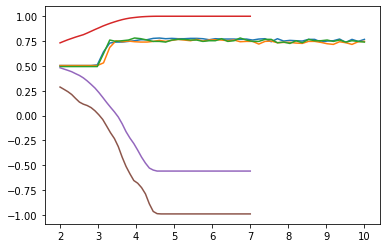

In [2]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline


###########################################################
# Support Vector Machine
###########################################################

# read data
df = pd.read_csv('data07_diabetes.csv')
X = df.iloc[:,:-1]
y = (df['Y']>140).factorize()[0]
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.33,random_state=0)

# svm
from sklearn.svm import SVC
f = SVC(C=5,kernel='poly',probability=True)
f.fit(xtrain,ytrain)
f.predict(xtest)
f.predict_proba(xtest)
f.score(xtrain,ytrain)
f.score(xtest,ytest)

# parameter tuning
params = 10**np.linspace(2,10,num=50)
s = np.zeros((len(params),3))
for i in range(len(params)):
    f = SVC(C=params[i],kernel='rbf',gamma=0.0001,random_state=0)
    f.fit(xtrain,ytrain)
    s[i,0] = f.score(xtrain,ytrain)
    s[i,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean()
    s[i,2] = f.score(xtest,ytest)
    
plt.plot(np.log10(params),s)


###########################################################
# Support Vector Regression
###########################################################

# read data
df = pd.read_csv('data07_diabetes.csv')
X = df.iloc[:,:-1]
y = df['Y']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.33,random_state=0)

# svr
from sklearn.svm import SVR
f = SVR(C=5,kernel='rbf')
f.fit(xtrain,ytrain)
f.predict(xtest)
f.score(xtrain,ytrain)
f.score(xtest,ytest)

# parameter tuning
params = 10**np.linspace(2,7,num=50)
s = np.zeros((len(params),3))
for i in range(len(params)):
    f = SVR(C=params[i],kernel='rbf')
    f.fit(xtrain,ytrain)
    s[i,0] = f.score(xtrain,ytrain)
    s[i,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean()
    s[i,2] = f.score(xtest,ytest)
    
plt.plot(np.log10(params),s)

In [ ]:
###########################################################
# Practice
###########################################################

# read data
df = pd.read_csv('data08_khan.csv',header=None)
dfx = df.iloc[:,1:]
dfy = df.iloc[:,0]
xtrain, ytrain = dfx.iloc[:63,:], dfy[:63]
xtest, ytest = dfx.iloc[63:,:], dfy[63:]

# PLEASE DO NOT GO DOWN BEFORE YOU TRY BY YOURSELF

###########################################################
# Practice Reference Code
###########################################################

# read data
df = pd.read_csv('data08_khan.csv',header=None)
dfx = df.iloc[:,1:]
dfy = df.iloc[:,0]
xtrain, ytrain = dfx.iloc[:63,:], dfy[:63]
xtest, ytest = dfx.iloc[63:,:], dfy[63:]

# classification
params = 10**np.linspace(-1,7,num=50)
s = np.zeros((len(params),3))
for i in range(len(params)):
    f = SVC(C=params[i],kernel='rbf')
    f.fit(xtrain,ytrain)
    s[i,0] = f.score(xtrain,ytrain)
    s[i,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean()
    s[i,2] = f.score(xtest,ytest)
plt.plot(np.log10(params),s)

# final predictor
f = SVC(C=params[5],kernel='rbf')
f.fit(xtrain,ytrain)
yhat_test = f.predict(xtest)
pd.crosstab(yhat_test,ytest)

# regression
params = 10**np.linspace(-3,3,num=10)
s = np.zeros((len(params),3))
for i in range(len(params)):
    f = SVR(C=params[i],kernel='rbf')
    f.fit(xtrain,ytrain)
    s[i,0] = f.score(xtrain,ytrain)
    s[i,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean()
    s[i,2] = f.score(xtest,ytest)
plt.plot(np.log10(params),s)

# final predictor
f = SVR(C=params[6],kernel='rbf')
f.fit(xtrain,ytrain)
plt.plot(f.predict(xtest),ytest,'go')